16.60601304625043


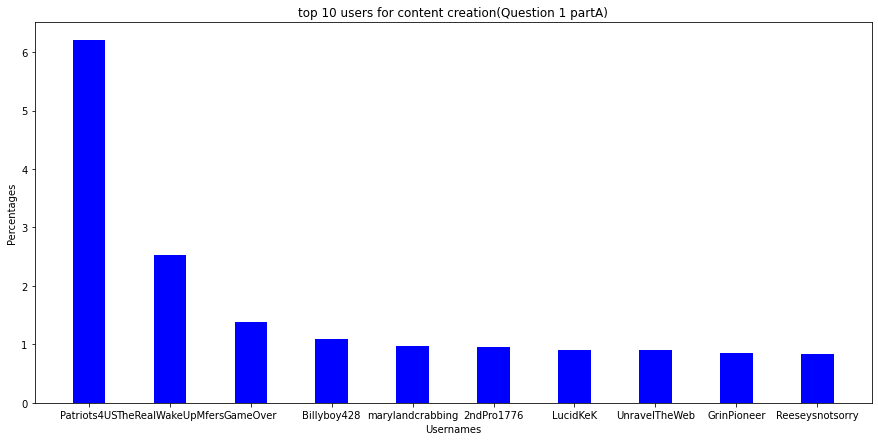

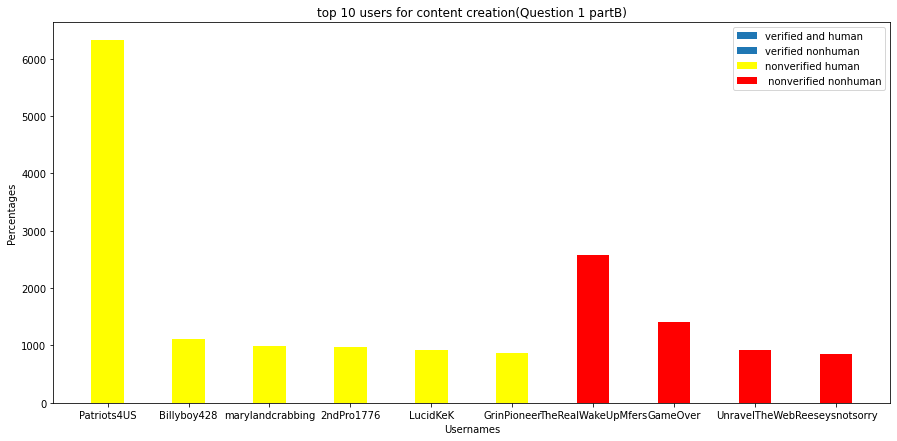

In [ ]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import ast
import re
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
import plotly.graph_objects as go
import plotly
import datetime as dt

#importing the datasets

posts_dataset=pd.read_csv("/content/drive/MyDrive/parlerData/parler_postsData.csv",delimiter=",")
posts_dataset.head()

user_dataset=pd.read_csv("/content/drive/MyDrive/parlerData/parler_userData.csv",delimiter=",")
user_dataset.head()

totalPosts=posts_dataset.shape
totalPosts=totalPosts[0]

creator=posts_dataset.Creator.to_list()
countOfpostPerUser=dict()
for i in range(len(creator)):
  if creator[i] in countOfpostPerUser.keys():
    countOfpostPerUser[creator[i]]=countOfpostPerUser[creator[i]]+1
  else:
    countOfpostPerUser.setdefault(creator[i],1)
sorted_countsList=sorted(countOfpostPerUser.items(), key=lambda x: x[1],reverse=True)[:10] 
sorted_counts={}

for a, b in sorted_countsList: 
        sorted_counts.setdefault(a, []).append(b)
user_name=user_dataset.Username.to_list()
user_id=user_dataset.Id.to_list()

verified=user_dataset.Verified.to_list()
human=user_dataset.Human.to_list()
for i in range(len(user_id)):
  if user_id[i] in sorted_counts.keys():
    sorted_counts[user_id[i]].append(user_name[i])
    if verified[i]==True:
      sorted_counts[user_id[i]].append(1)
    else:
      sorted_counts[user_id[i]].append(0)
    if human[i]==True:
      sorted_counts[user_id[i]].append(1)
    else:
      sorted_counts[user_id[i]].append(0)

user_name=[]
percentages=[]

for i in sorted_counts.values():
  user_name.append(i[1])
  percentages.append((int(i[0])/totalPosts)*100)
print(sum(percentages))
fig=plt.figure(figsize=(15,7))
plt.bar(user_name,percentages,color="blue",width=0.4)
plt.xlabel("Usernames")
plt.ylabel("Percentages")
plt.title("top 10 users for content creation(Question 1 partA)")
plt.show()

# part B
#print(sorted_counts)
l1_names=[]
l1_percentages=[]
l2_names=[]
l2_percentages=[]
l3_names=[]
l3_percentages=[]
l4_names=[]
l4_percentages=[]
for i in sorted_counts.keys():
  if sorted_counts[i][2]==1 and sorted_counts[i][3]==1 :
    l1_names.append(sorted_counts[i][1])
    l1_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][2]==1 and sorted_counts[i][3]==0 :
    l2_names.append(sorted_counts[i][1])
    l2_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][2]==0 and sorted_counts[i][3]==1 :
    l3_names.append(sorted_counts[i][1])
    l3_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][2]==0 and sorted_counts[i][3]==0 :
    l4_names.append(sorted_counts[i][1])
    l4_percentages.append(sorted_counts[i][0])

fig2=plt.figure(figsize=(15,7))
plt.bar(l1_names,l1_percentages,color="blue",width=0.4,label="verified and human")  
plt.bar(l2_names,l2_percentages,color="green",width=0.4,label="verified nonhuman") 
plt.bar(l3_names,l3_percentages,color="yellow",width=0.4,label="nonverified human")
plt.bar(l4_names,l4_percentages,color="red",width=0.4,label=" nonverified nonhuman")
plt.xlabel("Usernames")
plt.ylabel("Percentages")
plt.title("top 10 users for content creation(Question 1 partB)")
plt.legend()
plt.show()

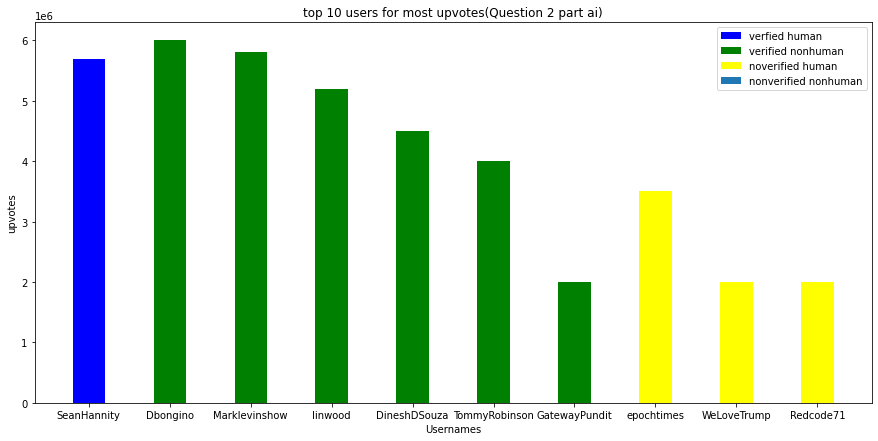

In [ ]:
#question 2
username=user_dataset.Username.to_list()
score=user_dataset.Score.to_list()
countOfupvotesPerUser=dict()

for i in range(len(score)):
    countOfupvotesPerUser[username[i]]=score[i]

sorted_countsList=sorted(countOfupvotesPerUser.items(), key=lambda x: x[1],reverse=True)[:10] 

sorted_counts={}
for a, b in sorted_countsList: 
        sorted_counts.setdefault(a, []).append(b)

for i in range(len(username)):
  if username[i] in sorted_counts.keys():
    if verified[i]==True:
      sorted_counts[username[i]].append(1)
    else:
      sorted_counts[username[i]].append(0)
    if human[i]==True:
      sorted_counts[username[i]].append(1)
    else:
      sorted_counts[username[i]].append(0)

l1_names=[]
l1_percentages=[]
l2_names=[]
l2_percentages=[]
l3_names=[]
l3_percentages=[]
l4_names=[]
l4_percentages=[]

for i in sorted_counts.keys():
  if sorted_counts[i][1]==1 and sorted_counts[i][2]==1 :
    l1_names.append(i)
    l1_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][1]==1 and sorted_counts[i][2]==0 :
    l2_names.append(i)
    l2_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][1]==0 and sorted_counts[i][2]==1 :
    l3_names.append(i)
    l3_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][1]==0 and sorted_counts[i][2]==0 :
    l4_names.append(i)
    l4_percentages.append(sorted_counts[i][0])

fig=plt.figure(figsize=(15,7))
plt.bar(l1_names,l1_percentages,color="blue",width=0.4,label="verfied human")
plt.bar(l2_names,l2_percentages,color="green",width=0.4,label="verified nonhuman")
plt.bar(l3_names,l3_percentages,color="yellow",width=0.4,label="noverified human")
plt.bar(l4_names,l4_percentages,color="red",width=0.4,label="nonverified nonhuman")
plt.legend()
plt.xlabel("Usernames")
plt.ylabel("upvotes")
plt.title("top 10 users for most upvotes(Question 2 part ai)")
plt.show()

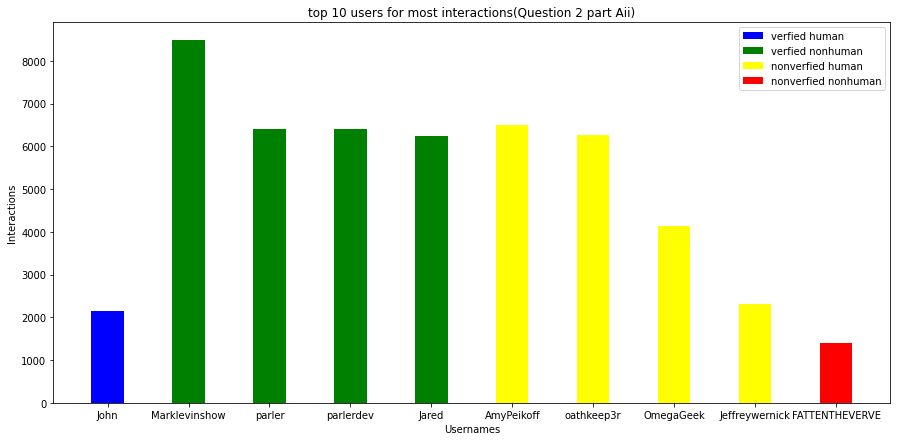

In [ ]:
interactions=user_dataset.Interactions.to_list()
countOfinteractionsPerUser=dict()


bio=user_dataset['Bio'].to_list()
bio_dict={}
for i in range(len(interactions)):
    temp=str(bio[i]).replace("\\n","")
    temp=temp.replace("org"," ")
    bio_dict[username[i]]=temp
    countOfinteractionsPerUser[username[i]]=interactions[i]

sorted_countsList=sorted(countOfinteractionsPerUser.items(), key=lambda x: x[1],reverse=True)[:10] 

sorted_counts={}
for a, b in sorted_countsList: 
        sorted_counts.setdefault(a, []).append(b)
text=""
for i in sorted_counts.keys():
  text=text+re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', bio_dict[i])
sw=set(STOPWORDS)
wc=WordCloud(background_color="black",max_words=200,stopwords=sw)
wc.generate(text)

wc.to_file("wc1.png")

for i in range(len(username)):
  if username[i] in sorted_counts.keys():
    if verified[i]==True:
      sorted_counts[username[i]].append(1)
    else:
      sorted_counts[username[i]].append(0)
    if human[i]==True:
      sorted_counts[username[i]].append(1)
    else:
      sorted_counts[username[i]].append(0)
l1_names=[]
l1_percentages=[]
l2_names=[]
l2_percentages=[]
l3_names=[]
l3_percentages=[]
l4_names=[]
l4_percentages=[]
for i in sorted_counts.keys():
  if sorted_counts[i][1]==1 and sorted_counts[i][2]==1 :
    l1_names.append(i)
    l1_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][1]==1 and sorted_counts[i][2]==0 :
    l2_names.append(i)
    l2_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][1]==0 and sorted_counts[i][2]==1 :
    l3_names.append(i)
    l3_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][1]==0 and sorted_counts[i][2]==0 :
    l4_names.append(i)
    l4_percentages.append(sorted_counts[i][0])

fig=plt.figure(figsize=(15,7))
plt.bar(l1_names,l1_percentages,color="blue",width=0.4,label="verfied human")
plt.bar(l2_names,l2_percentages,color="green",width=0.4,label="verfied nonhuman")
plt.bar(l3_names,l3_percentages,color="yellow",width=0.4,label="nonverfied human")
plt.bar(l4_names,l4_percentages,color="red",width=0.4,label="nonverfied nonhuman")
plt.legend()
plt.xlabel("Usernames")
plt.ylabel("Interactions")
plt.title("top 10 users for most interactions(Question 2 part Aii)")
plt.show()

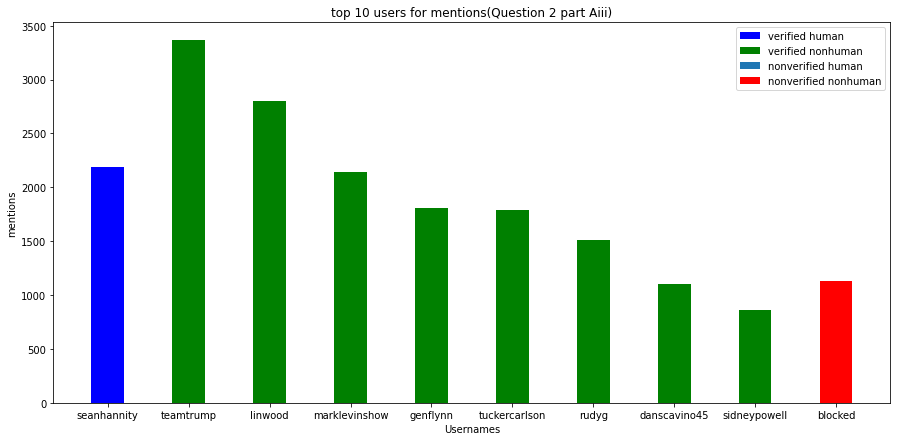

In [ ]:
at=posts_dataset["At"]
usermentions={}

for i in at:
  if len(i)>2:
    temp=ast.literal_eval(i)
    for j in temp.keys():
      if j in usermentions.keys():
        usermentions[j]=usermentions[j]+1
      else:
        usermentions.setdefault(j,1)

sorted_countsList=sorted(usermentions.items(), key=lambda x: x[1],reverse=True)[:10] 
sorted_counts={}
for a, b in sorted_countsList: 
        sorted_counts.setdefault(a, []).append(b)
name=[]
mentions=[]
for i in sorted_counts.keys():
  name.append(str(i))

for i in range(len(username)):
  if username[i].lower() in name:
    if verified[i]==True:
      sorted_counts[username[i].lower()].append(1)
    else:
      sorted_counts[username[i].lower()].append(0)
    if human[i]==True:
      sorted_counts[username[i].lower()].append(1)
    else:
      sorted_counts[username[i].lower()].append(0)

l1_names=[]
l1_percentages=[]
l2_names=[]
l2_percentages=[]
l3_names=[]
l3_percentages=[]
l4_names=[]
l4_percentages=[]
for i in sorted_counts.keys():
  if sorted_counts[i][1]==1 and sorted_counts[i][2]==1 :
    l1_names.append(i)
    l1_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][1]==1 and sorted_counts[i][2]==0 :
    l2_names.append(i)
    l2_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][1]==0 and sorted_counts[i][2]==1 :
    l3_names.append(i)
    l3_percentages.append(sorted_counts[i][0])
  if sorted_counts[i][1]==0 and sorted_counts[i][2]==0 :
    l4_names.append(i)
    l4_percentages.append(sorted_counts[i][0])

fig=plt.figure(figsize=(15,7))
plt.bar(l1_names,l1_percentages,color="blue",width=0.4,label="verified human")
plt.bar(l2_names,l2_percentages,color="green",width=0.4,label="verified nonhuman")
plt.bar(l3_names,l3_percentages,color="yellow",width=0.4,label="nonverified human")
plt.bar(l4_names,l4_percentages,color="red",width=0.4,label="nonverified nonhuman")
plt.legend()
plt.xlabel("Usernames")
plt.ylabel("mentions")
plt.title("top 10 users for mentions(Question 2 part Aiii)")
plt.show()

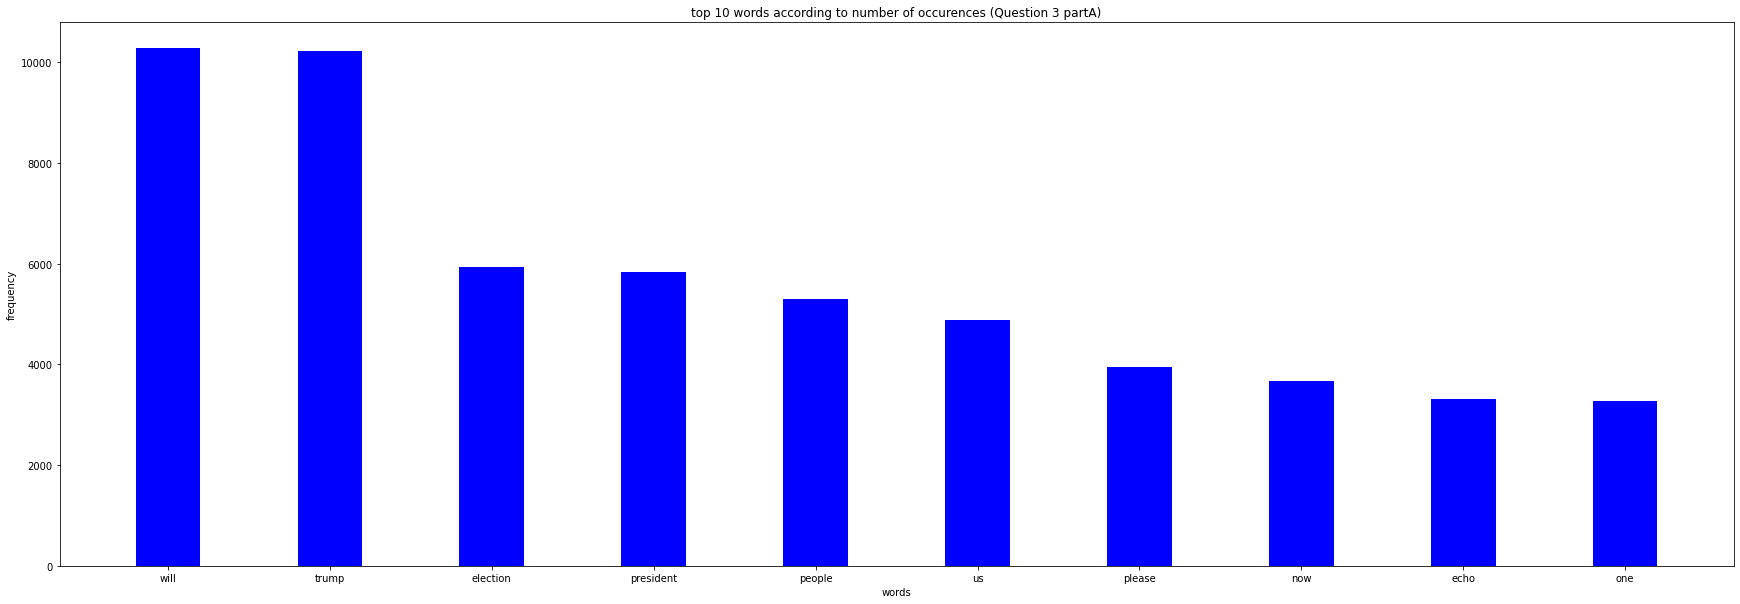

In [ ]:
body=posts_dataset["Body"].fillna("").to_list()
for i in range(len(body)):
  body[i]=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', body[i])
  body[i]=body[i].replace("#"," #")
  body[i]=body[i].replace("\\n"," ")
  body[i]=body[i].lower()
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  body[i]=emoji_pattern.sub(r'', body[i])

words=[]
def look(word):
  url=r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
  if len(word)==0:
    return 1
  if re.search(url,word):
    return 1
  return 0
hash=[]
for i in body:
  split=i.split()
  for j in split:
    if j[0]=="#" and look(j)==0:
      hash.append(j)
    elif j[0]!="#" and look(j)==0 and j[0]!="@" and j.isalnum():
      words.append(j)

wc_words=" ".join(words)
wc_hashtags=" ".join(hash)
wc.generate(wc_words)
wc.to_file("wc_word.png")

wc.generate(wc_hashtags)
wc.to_file("wc_hash.png")

wordfreq={}

for word in words:
  if word not in set(STOPWORDS):
    if word in wordfreq:
      wordfreq[word]=wordfreq[word]+1
    else:
      wordfreq[word]=1
freq_words=pd.DataFrame({"words": list(wordfreq.keys()),"frequency":list(wordfreq.values())}).sort_values(["frequency"],ascending=False).head(n=10)

fig=plt.figure(figsize=(30,10))
plt.bar(freq_words["words"],freq_words["frequency"],color="blue",width=0.4)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("top 10 words according to number of occurences (Question 3 partA)")
plt.show()

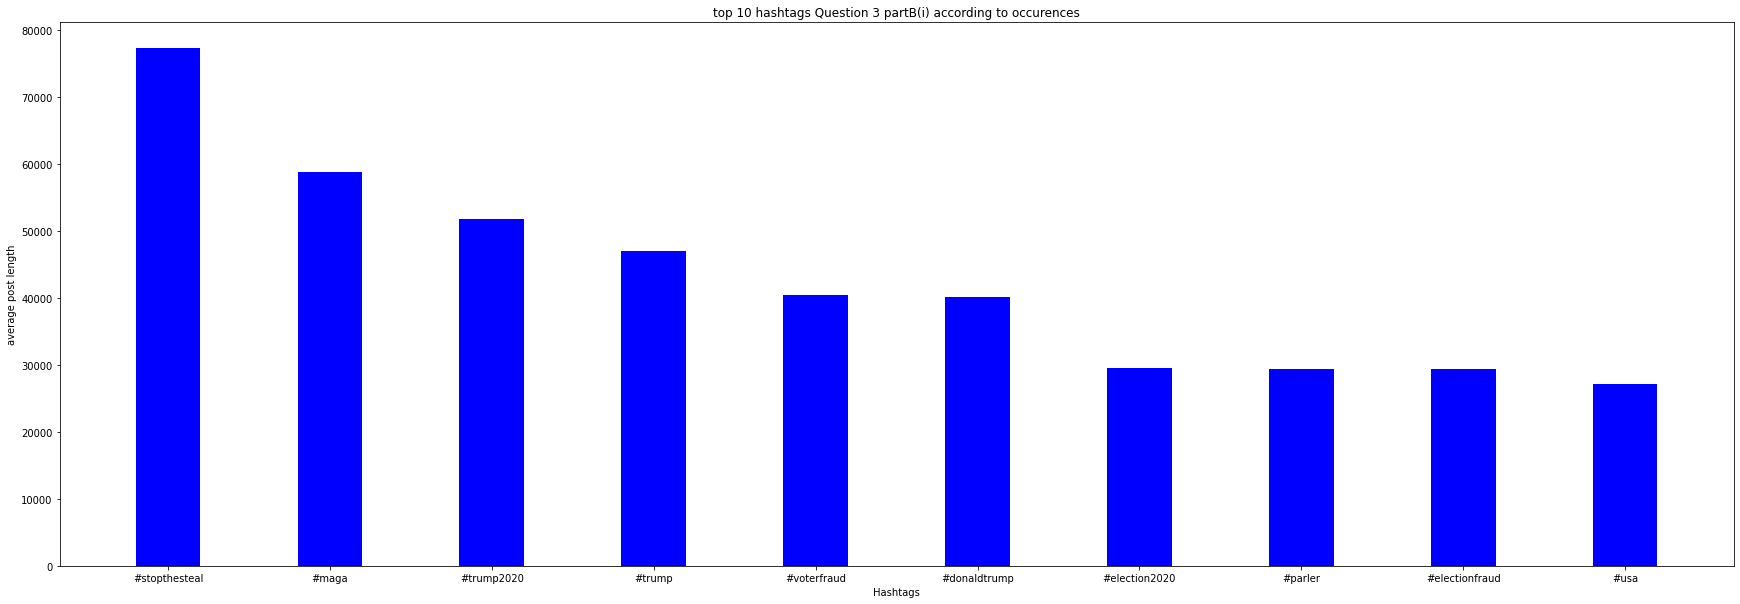

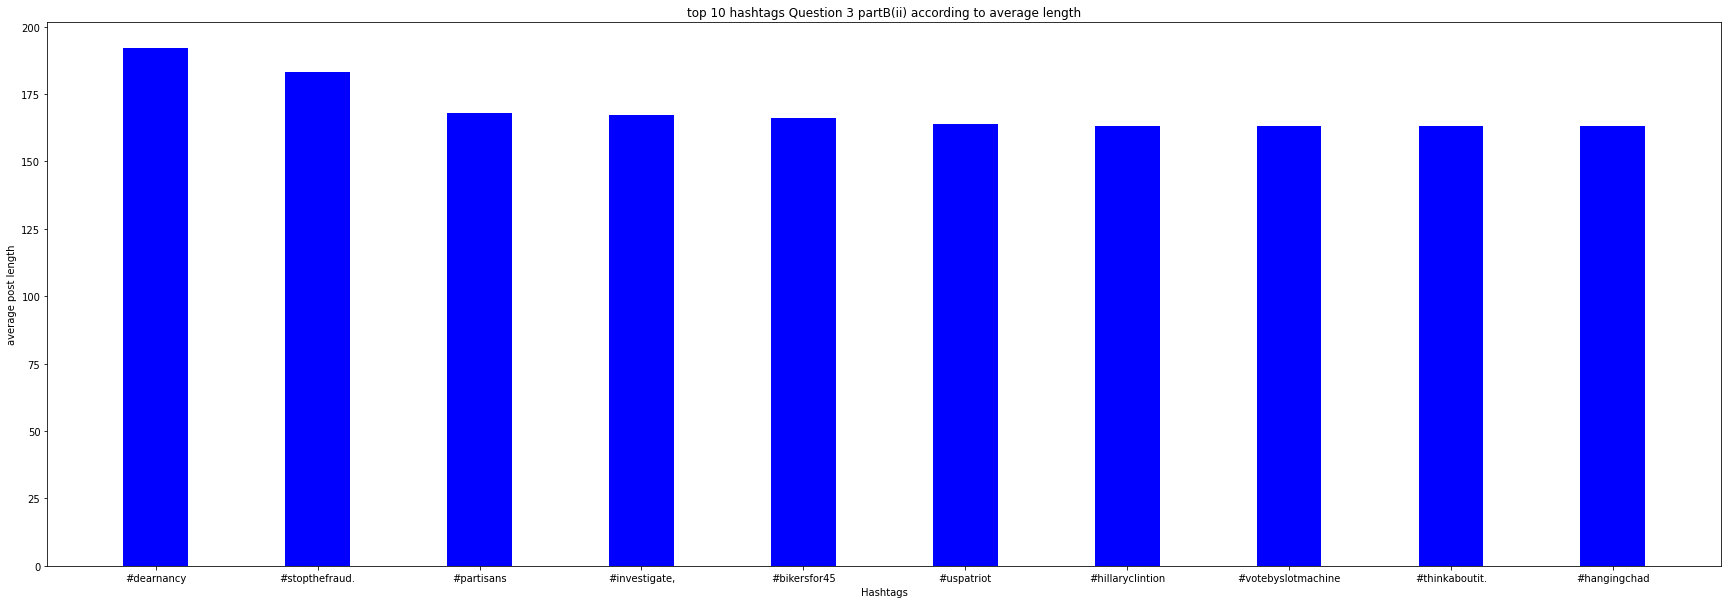

In [ ]:
for i in range(len(body)):
  body[i]=body[i].replace("#"," #")

hashfreq={}
hashwordcount={}

for i in body:
  split=i.split()
  cnt=0
  for j in split:
    if j[0]!="#":
        cnt=cnt+1
  for j in split:
    if j[0]=="#":
      if j in hashfreq:
        hashfreq[j]=hashfreq[j]+1
        hashwordcount[j]=hashwordcount[j]+cnt
      else:
        hashfreq[j]=1
        hashwordcount[j]=cnt
freq=pd.DataFrame({"Hashtags": list(hashfreq.keys()),"length":list(hashfreq.values())}).sort_values(["length"],ascending=False).head(n=10)

fig=plt.figure(figsize=(30,10))
plt.bar(freq["Hashtags"],freq["length"],color="blue",width=0.4)
plt.xlabel("Hashtags")
plt.ylabel("average post length")
plt.title("top 10 hashtags Question 3 partB(i) according to occurences")
plt.show()

for i in hashfreq.keys():
    hashfreq[i]=hashwordcount[i]/hashfreq[i]

freq=pd.DataFrame({"Hashtags": list(hashfreq.keys()),"length":list(hashfreq.values())}).sort_values(["length"],ascending=False).head(n=10)

fig=plt.figure(figsize=(30,10))
plt.bar(freq["Hashtags"],freq["length"],color="blue",width=0.4)
plt.xlabel("Hashtags")
plt.ylabel("average post length")
plt.title("top 10 hashtags Question 3 partB(ii) according to average length")
plt.show()

In [ ]:
post_created=posts_dataset["CreatedAt"]
post_perDatehour={}
for i in post_created:
    datetime=str(i)[0:10]
    h=datetime[:4]+"-"+datetime[4:6]+"-"+datetime[6:8]+"-"+datetime[8:10]
    h = dt.datetime.strptime(h, '%Y-%m-%d-%H')
    if h in post_perDatehour.keys():
      post_perDatehour[h]=post_perDatehour[h]+1
    else:
      post_perDatehour.setdefault(h,1)
freqdatehour=pd.DataFrame({"date-hour": list(post_perDatehour.keys()),"posts":list(post_perDatehour.values())}).sort_values(["date-hour"],ascending=False)
fig = [go.Scatter(x=freqdatehour['date-hour'], y=freqdatehour['posts'])]
plotly.offline.iplot(fig)

In [ ]:
user_joined=user_dataset["Joined"]
user_perDatehour={}
for i in user_joined:
    datetime=str(i)
    h=datetime[:4]+"-"+datetime[4:6]+"-"+datetime[6:8]+"-"+datetime[8:10]
    h = dt.datetime.strptime(h, '%Y-%m-%d-%H')
    if h in user_perDatehour.keys():
      user_perDatehour[h]=user_perDatehour[h]+1
    else:
      user_perDatehour.setdefault(h,1)
freqdatehour=pd.DataFrame({"date-hour": list(user_perDatehour.keys()),"users joined":list(user_perDatehour.values())}).sort_values(["date-hour"],ascending=False)
fig = [go.Scatter(x=freqdatehour['date-hour'], y=freqdatehour['users joined'],)]
plotly.offline.iplot(fig)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
